<a href="https://colab.research.google.com/github/giorgianardelli/ICon-22-23/blob/main/ICON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [70]:
#importazione libreria pandas usata per leggere e scrivere dati tra strutture dati in memoria e diversi formati, in questo caso per CSV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

READ CSV

In [71]:
df = pd.read_csv('weatherAUS.csv')

#Visualizzazione della dimensione e delle colonne del dataframe
print('Dimensione del dataframe iniziale: ', df.shape)
df.columns

Dimensione del dataframe iniziale:  (145460, 23)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

##PREPROCESSING

In [72]:
#Feature Selection
df = df.drop(columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Date'])
df.shape

(145460, 19)

In [73]:
#Conto dei valori nulli per colonne
print("Conto del numero totale di valori N/A per righe: ")
df.isna().sum(axis=0)

Conto del numero totale di valori N/A per righe: 


Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [74]:
#controlla i valori mancanti (NaN) nella colonna RainToday e RainTomorrow e se viene rilevato un valore mancante quella riga che contiene quel valore viene eliminata dal df
df = df[df['RainToday'].notna()]
df = df[df['RainTomorrow'].notna()]

In [75]:
#ENCODING PER RainToday e RainTomorrow
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [76]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [77]:
#ENCODING PER LOCATION
mapper = {location: i for i, location in enumerate(df['Location'].unique())}
df['Location'] = df['Location'].map(mapper)
df.dtypes

Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

##BILANCIAMENTO DEI CAMPIONI

In [78]:
print('Non pioverà .... {0}'.format(len([i for i in df['RainTomorrow'] if i==0])))
print('Pioverà .... {0}'.format(len([i for i in df['RainTomorrow'] if i==1])))

Non pioverà .... 109586
Pioverà .... 31201


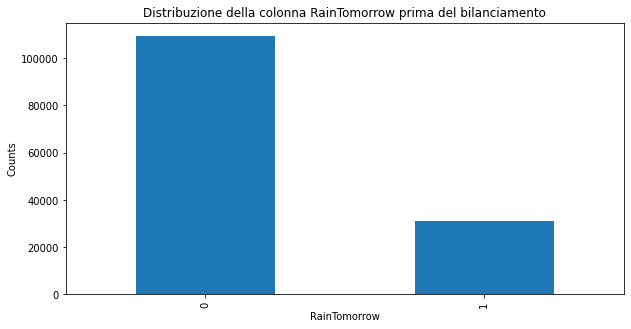

In [79]:
# grafico che mostra la colonna RainTomorrow prima del bilanciamento dei valori
plt.figure(figsize=(10,5))
plt.title("Distribuzione della colonna RainTomorrow prima del bilanciamento")
df['RainTomorrow'].value_counts().plot(kind='bar')
plt.xlabel('RainTomorrow')
plt.ylabel('Counts')
plt.show()

In [80]:
#BILANCIAMENTO DEI CAMPIONI

#divido il dataset
df_pioggia = df[df['RainTomorrow']==1]
df_non_pioggia = df[df['RainTomorrow']==0]

df_non_pioggia = df_non_pioggia.sample(n=len(df_pioggia), random_state=123)

In [81]:
#riempiamo i valori mancanti (N/A) all'interno del DataFrame df_pioggia con la media di tutti i valori del DataFrame df_pioggia
df_pioggia = df_pioggia.fillna(df_pioggia.mean())

#riempiamo i valori mancanti (N/A) all'interno del DataFrame df_non_pioggia con la media di tutti i valori del DataFrame df_non_pioggia
df_non_pioggia = df_non_pioggia.fillna(df_non_pioggia.mean())

In [82]:
#concateniamo i due DataFrame
df_balanced = pd.concat([df_pioggia, df_non_pioggia])
df_balanced

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,0,9.7,31.9,0.0,4.528762,4.450802,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,6.097577,6.367638,18.3,30.2,0,1
10,0,13.4,30.4,0.0,4.528762,4.450802,30.0,17.0,6.0,48.0,22.0,1011.8,1008.7,6.097577,6.367638,20.4,28.8,0,1
11,0,15.9,21.7,2.2,4.528762,4.450802,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,8.000000,8.000000,15.9,17.0,1,1
12,0,15.9,18.6,15.6,4.528762,4.450802,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1,1
16,0,14.1,20.9,0.0,4.528762,4.450802,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.000000,1.000000,17.2,18.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106606,35,14.7,26.7,0.0,5.753928,8.598272,54.0,31.0,28.0,57.0,28.0,1011.0,1009.2,0.000000,3.898532,17.6,24.9,0,0
94773,31,22.0,30.7,0.0,7.000000,10.800000,28.0,9.0,17.0,65.0,54.0,1014.3,1011.4,4.000000,1.000000,28.3,29.8,0,0
141813,46,27.4,35.3,0.0,7.000000,9.900000,30.0,9.0,19.0,75.0,62.0,1013.0,1009.0,8.000000,2.000000,29.4,33.3,0,0
70963,23,2.3,15.0,0.0,1.000000,9.300000,22.0,7.0,9.0,95.0,51.0,1033.3,1031.3,0.000000,0.000000,5.3,14.7,0,0


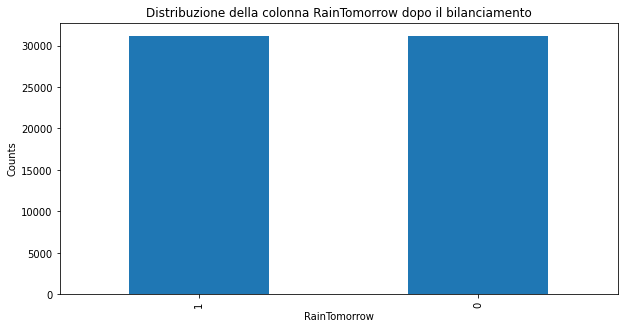

In [83]:
# grafico che mostra la colonna RainTomorrow dopo il bilanciamento dei valori
plt.figure(figsize=(10,5))
plt.title("Distribuzione della colonna RainTomorrow dopo il bilanciamento")
df_balanced['RainTomorrow'].value_counts().plot(kind='bar')
plt.xlabel('RainTomorrow')
plt.ylabel('Counts')
plt.show()

SPLIT DATASET TRAIN E TEST

In [84]:
X = df_balanced.loc[:, df_balanced.columns != 'RainTomorrow']
Y = df_balanced['RainTomorrow']

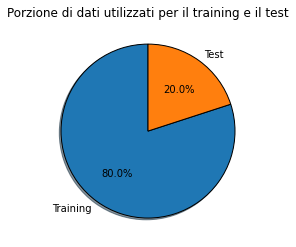

In [85]:
#grafico che mostra porzione di dati utilizzata per il training e per il test
training_data = 0.8
testing_data = 0.2

# Imposto i dati
labels = ['Training', 'Test']
sizes = [training_data, testing_data]

# Creo il grafico a torta
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%', shadow=True, wedgeprops={'edgecolor': 'black'})

# Aggiungo il titolo
plt.title("Porzione di dati utilizzati per il training e il test")

# Mostro il grafico
plt.show()

In [86]:
X=df_balanced.loc[:, df.columns!='RainTomorrow']
Y=df_balanced['RainTomorrow']
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.20, 
                                                    random_state=123)

##MODELLI DI CLASSIFICAZIONE

REGRESSIONE LOGISTICA

In [87]:
# modello di regressione logistica del train
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
# previsioni sul set di test
y_pred = lr.predict(X_test)

# valutare le performance del modello
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.861629677109206
Precision: 0.8603761555626395
Recall: 0.8638182109137462
F1 score: 0.8620937475045916


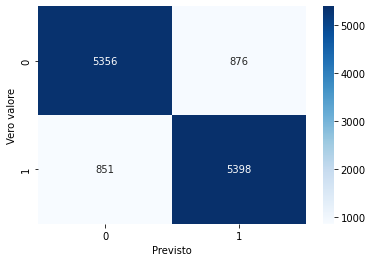

In [89]:
#usiamo La matrice di confusione per fornire un'ulteriore idea delle prestazioni del modello
# Calcola la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Crea la heatmap della matrice di confusione
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Vero valore')
plt.show()

ALBERO DI DECISIONE

In [90]:
# crea un'istanza di DecisionTreeClassifier
model = DecisionTreeClassifier()

# addestra il modello sui dati di addestramento
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [91]:
# effettua previsioni sui dati di test
y_pred = model.predict(X_test)

# valuta le performance del modello
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.8771733034212003
Precision: 0.8778846153846154
Recall: 0.8766202592414787
F1 score: 0.8772519817439347


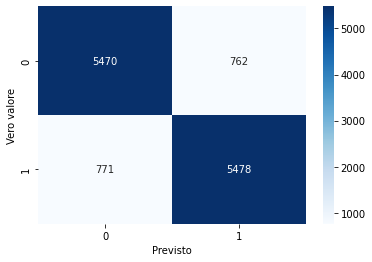

In [92]:
#usiamo La matrice di confusione per fornire un'ulteriore idea delle prestazioni del modello
# Calcola la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Crea la heatmap della matrice di confusione
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Vero valore')
plt.show()

CLASSIFICATORE BAYESIANO

In [93]:
# crea un'istanza di GaussianNB
model = GaussianNB()

# addestra il modello sui dati di addestramento
model.fit(X_train, y_train)

GaussianNB()

In [94]:
# effettua previsioni sui dati di test
y_pred = model.predict(X_test)

# valuta le performance del modello
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.832144860187485
Precision: 0.8463975983989326
Recall: 0.8121299407905265
F1 score: 0.8289097590853408


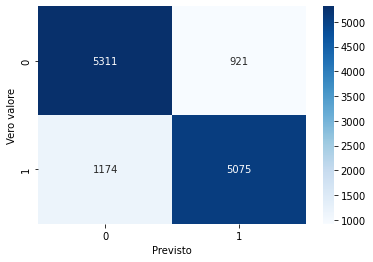

In [95]:
#usiamo La matrice di confusione per fornire un'ulteriore idea delle prestazioni del modello
# Calcola la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Crea la heatmap della matrice di confusione
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Vero valore')
plt.show()

##PROLOG

In [96]:
insiemeProp= ["temperatura(albury, 20)", "temperatura(badgerysCreek, 18)","temperatura(cobar, 3)","temperatura(coffsHarbour, 21)",
              "temperatura(moree, 14)","temperatura(newcastle, 8)","temperatura(norahHead, 10)","temperatura(norfolkIsland, 15)",
              "temperatura(penrith, 17)","temperatura(sydney, 6)","temperatura(sydneyAirport, 6)","temperatura(waggaWagga, 7)",
              "temperatura(williamtown, 9)","temperatura(wollongong, 16)","temperatura(canberra, 15)","temperatura(tuggeranong, 18)",
              "temperatura(mountGinini, 9)","temperatura(ballarat, 8)","temperatura(bendigo, 8)","temperatura(sale, 6)",
              "temperatura(melbourneAirport, 3)","temperatura(melbourne, 4)","temperatura(mildura, 9)","temperatura(nhil, 15)",
              "temperatura(portland, 12)","temperatura(watsonia, 10)","temperatura(dartmoor, 11)","temperatura(brisbane, 19)",
              "temperatura(cairns, 1)","temperatura(goldCoast, 20)","temperatura(townsville, 15)","temperatura(adelaide, 16)",
              "temperatura(mountGambier, 9)","temperatura(nuriootpa, 23)","temperatura(woomera, 21)","temperatura(albany, 16)",
              "temperatura(witchcliffe, 8)","temperatura(pearceRAAF, 21)","temperatura(perthAirport, 6)","temperatura(perth, 9)",
              "temperatura(salmonGums, 9)","temperatura(walpole, 11)","temperatura(hobart, 19)","temperatura(launceston, 10)",
              "temperatura(aliceSprings, 20)","temperatura(darwin, 6)","temperatura(katherine, 2)","temperatura(uluru, 17)",
              #divisorio
              "km_vento(albury, 8)", "km_vento(badgerysCreek, 18)","km_vento(cobar, 90)","km_vento(coffsHarbour, 21)",
              "km_vento(moree, 14)","km_vento(newcastle, 8)","km_vento(norahHead, 10)","km_vento(norfolkIsland, 15)",
              "km_vento(penrith, 17)","km_vento(sydney, 65)","km_vento(sydneyAirport, 62)","km_vento(waggaWagga, 80)",
              "km_vento(williamtown, 9)","km_vento(wollongong, 16)","km_vento(canberra, 15)","km_vento(tuggeranong, 18)",
              "km_vento(mountGinini, 50)","km_vento(ballarat, 50)","km_vento(bendigo, 42)","km_vento(sale, 67)",
              "km_vento(melbourneAirport, 18)","km_vento(melbourne, 80)","km_vento(mildura, 46)","km_vento(nhil, 15)",
              "km_vento(portland, 62)","km_vento(watsonia, 10)","km_vento(dartmoor, 11)","km_vento(brisbane, 19)",
              "km_vento(cairns, 10)","km_vento(goldCoast, 20)","km_vento(townsville, 15)","km_vento(adelaide, 75)",
              "km_vento(mountGambier, 45)","km_vento(nuriootpa, 23)","km_vento(woomera, 21)","km_vento(albany, 16)",
              "km_vento(witchcliffe, 50)","km_vento(pearceRAAF, 21)","km_vento(perthAirport, 65)","km_vento(perth, 43)",
              "km_vento(salmonGums, 57)","km_vento(walpole, 11)","km_vento(hobart, 19)","km_vento(launceston, 10)",
              "km_vento(aliceSprings, 20)","km_vento(darwin, 67)","km_vento(katherine, 80)","km_vento(uluru, 17)",
              #divisorio
              "umidita_percento(albury, 8)", "umidita_percento(badgerysCreek, 18)","umidita_percento(cobar, 11)","umidita_percento(coffsHarbour, 21)",
              "umidita_percento(moree, 14)","umidita_percento(newcastle, 8)","umidita_percento(norahHead, 10)","umidita_percento(norfolkIsland, 15)",
              "umidita_percento(penrith, 17)","umidita_percento(sydney, 13)","umidita_percento(sydneyAirport, 12)","umidita_percento(waggaWagga, 7)",
              "umidita_percento(williamtown, 9)","umidita_percento(wollongong, 16)","umidita_percento(canberra, 15)","umidita_percento(tuggeranong, 18)",
              "umidita_percento(mountGinini, 11)","umidita_percento(ballarat, 17)","umidita_percento(bendigo, 6)","umidita_percento(sale, 8)",
              "umidita_percento(melbourneAirport, 18)","umidita_percento(melbourne, 16)","umidita_percento(mildura, 9)","umidita_percento(nhil, 15)",
              "umidita_percento(portland, 12)","umidita_percento(watsonia, 10)","umidita_percento(dartmoor, 11)","umidita_percento(brisbane, 19)",
              "umidita_percento(cairns, 10)","umidita_percento(goldCoast, 20)","umidita_percento(townsville, 15)","umidita_percento(adelaide, 16)",
              "umidita_percento(mountGambier, 22)","umidita_percento(nuriootpa, 23)","umidita_percento(woomera, 21)","umidita_percento(albany, 16)",
              "umidita_percento(witchcliffe, 18)","umidita_percento(pearceRAAF, 21)","umidita_percento(perthAirport, 25)","umidita_percento(perth, 14)",
              "umidita_percento(salmonGums, 17)","umidita_percento(walpole, 11)","umidita_percento(hobart, 19)","umidita_percento(launceston, 10)",
              "umidita_percento(aliceSprings, 20)","umidita_percento(darwin, 22)","umidita_percento(katherine, 21)","umidita_percento(uluru, 17)",
              #divisorio
              "condizione_attuale(albury, soleggiato)", "condizione_attuale(badgerysCreek, nuvoloso)","condizione_attuale(cobar, pioggia)","condizione_attuale(coffsHarbour, soleggiato)",
              "condizione_attuale(moree, soleggiato)","condizione_attuale(newcastle, soleggiato)","condizione_attuale(norahHead, pioggia)","condizione_attuale(norfolkIsland, nuvoloso)",
              "condizione_attuale(penrith, nuvoloso)","condizione_attuale(sydney, pioggia)","condizione_attuale(sydneyAirport, pioggia)","condizione_attuale(waggaWagga, soleggiato)",
              "condizione_attuale(williamtown, nuvoloso)","condizione_attuale(wollongong, soleggiato)","condizione_attuale(canberra, pioggia)","condizione_attuale(tuggeranong, nuvoloso)",
              "condizione_attuale(mountGinini, pioggia)","condizione_attuale(ballarat, pioggia)","condizione_attuale(bendigo, pioggia)","condizione_attuale(sale, pioggia)",
              "condizione_attuale(melbourneAirport, soleggiato)","condizione_attuale(melbourne, pioggia)","condizione_attuale(mildura, pioggia)","condizione_attuale(nhil, soleggiato)",
              "condizione_attuale(portland, nuvoloso)","condizione_attuale(watsonia, soleggiato)","condizione_attuale(dartmoor, soleggiato)","condizione_attuale(brisbane, nuvoloso)",
              "condizione_attuale(cairns, soleggiato)","condizione_attuale(goldCoast, soleggiato)","condizione_attuale(townsville, nuvoloso)","condizione_attuale(adelaide, nuvoloso)",
              "condizione_attuale(mountGambier, pioggia)","condizione_attuale(nuriootpa, soleggiato)","condizione_attuale(woomera, nebbia)","condizione_attuale(albany, soleggiato)",
              "condizione_attuale(witchcliffe, pioggia)","condizione_attuale(pearceRAAF, pioggia)","condizione_attuale(perthAirport, pioggia)","condizione_attuale(perth, pioggia)",
              "condizione_attuale(salmonGums, pioggia)","condizione_attuale(walpole, nuvoloso)","condizione_attuale(hobart, soleggiato)","condizione_attuale(launceston, nuvoloso)",
              "condizione_attuale(aliceSprings, nuvoloso)","condizione_attuale(darwin, pioggia)","condizione_attuale(katherine, pioggia)","condizione_attuale(uluru, pioggia)",
              #divisorio
              "mm_pioggia(albury, 0)", "mm_pioggia(badgerysCreek, 0)","mm_pioggia(cobar, 4)","mm_pioggia(coffsHarbour, 0)",
              "mm_pioggia(moree, 0)","mm_pioggia(newcastle, 0)","mm_pioggia(norahHead, 1.4)","mm_pioggia(norfolkIsland, 0)",
              "mm_pioggia(penrith, 2)","mm_pioggia(sydney, 4)","mm_pioggia(sydneyAirport, 3)","mm_pioggia(waggaWagga, 0)",
              "mm_pioggia(williamtown, 0)","mm_pioggia(wollongong, 0)","mm_pioggia(canberra, 1.2)","mm_pioggia(tuggeranong, 0)",
              "mm_pioggia(mountGinini, 3)","mm_pioggia(ballarat, 3.4)","mm_pioggia(bendigo, 5)","mm_pioggia(sale, 3)",
              "mm_pioggia(melbourneAirport, 0)","mm_pioggia(melbourne, 3.4)","mm_pioggia(mildura, 5)","mm_pioggia(nhil, 0)",
              "mm_pioggia(portland, 0)","mm_pioggia(watsonia, 0)","mm_pioggia(dartmoor, 0)","mm_pioggia(brisbane, 0)",
              "mm_pioggia(cairns, 0)","mm_pioggia(goldCoast, 0)","mm_pioggia(townsville, 0)","mm_pioggia(adelaide, 0)",
              "mm_pioggia(mountGambier, 4.5)","mm_pioggia(nuriootpa, 0)","mm_pioggia(woomera, 0)","mm_pioggia(albany, 0)",
              "mm_pioggia(witchcliffe, 4.5)","mm_pioggia(pearceRAAF, 2)","mm_pioggia(perthAirport, 4.5)","mm_pioggia(perth, 4)",
              "mm_pioggia(salmonGums, 3)","mm_pioggia(walpole, 0)","mm_pioggia(hobart, 0)","mm_pioggia(launceston, 0)",
              "mm_pioggia(aliceSprings, 0)","mm_pioggia(darwin, 4.5)","mm_pioggia(katherine, 4.5)","mm_pioggia(uluru, 2.4)",
              #divisorio
              "pioggia_forte(Citta) :- condizione_attuale(Citta, pioggia), mm_pioggia(Citta, M), M>2",
              "vento_forte(Citta) :- km_vento(Citta, K), K>40",
              "vento_allerta_gialla(Citta) :- km_vento(Citta, K), K>=40, K<60",
              "vento_allerta_arancione(Citta) :- km_vento(Citta, K), K>=60, K<75",
              "vento_allerta_rossa(Citta) :- km_vento(Citta, K), K>=75",
              "allerta(Citta) :- pioggia_forte(Citta), vento_forte(Citta), temperatura(Citta, T), T <= 10",
              "allerta_gialla(Citta) :- pioggia_forte(Citta), vento_allerta_gialla(Citta), temperatura(Citta, T), T >= 7, T <= 10",
              "allerta_arancione(Citta) :- pioggia_forte(Citta), vento_allerta_arancione(Citta), temperatura(Citta, T), T >= 5, T < 7",
              "allerta_rossa(Citta) :- pioggia_forte(Citta), vento_allerta_rossa(Citta), temperatura(Citta, T), T < 5"]


!pip install pytholog
import pytholog

#creazione e popolazione kb
kbMeteo = pytholog.KnowledgeBase("meteo")
for prop in insiemeProp:
    #inseriamo ogni proprietà nella KB
    kbMeteo([prop])

#query
risultatoQuery = kbMeteo.query(pytholog.Expr("temperatura(X, 20)"))
print("\n Le citta' con temperatura di 20 gradi sono: ", risultatoQuery)

risultatoQuery = kbMeteo.query(pytholog.Expr("temperatura(uluru, 17)"))
print("\n La temperatura della citta' Uluru e' 17? ", risultatoQuery)

risultatoQuery = kbMeteo.query(pytholog.Expr("condizione_attuale(X, sole)"))
print("\n Le citta' con meteo soleggiato al momento sono: ", risultatoQuery)

risultatoQuery = kbMeteo.query(pytholog.Expr("pioggia_forte(townsville)"))
print("\nLa pioggia e' forte a townsville? ", risultatoQuery)

risultatoQuery = kbMeteo.query(pytholog.Expr("allerta_gialla(mountGinini)"))
print("\n Allerta meteo gialla per Mount Ginini?", risultatoQuery)

risultatoQuery = kbMeteo.query(pytholog.Expr("pioggia_forte(sydney)"))
print("\nLa pioggia e' forte a sydney? ", risultatoQuery)

risultatoQuery = kbMeteo.query(pytholog.Expr("allerta_arancione(sydney)"))
print("\nAllerta meteo arancione per sydney? ", risultatoQuery)

risultatoQuery = kbMeteo.query(pytholog.Expr("allerta_arancione(townsville)"))
print("\nAllerta meteo arancione per townsville? ", risultatoQuery)

risultatoQuery = kbMeteo.query(pytholog.Expr("allerta(bendigo)"))
print("\n Le citta' con meteo soleggiato al momento sono: ", risultatoQuery)

risultatoQuery = kbMeteo.query(pytholog.Expr("umidita_percento(X, 16)"))
print("\n Le citta' con meteo soleggiato al momento sono: ", risultatoQuery)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

 Le citta' con temperatura di 20 gradi sono:  [{'X': 'albury'}, {'X': 'aliceSprings'}, {'X': 'goldCoast'}]

 La temperatura della citta' Uluru e' 17?  ['Yes']

 Le citta' con meteo soleggiato al momento sono:  ['No']

La pioggia e' forte a townsville?  ['No']

 Allerta meteo gialla per Mount Ginini? ['Yes']

La pioggia e' forte a sydney?  ['Yes']

Allerta meteo arancione per sydney?  ['Yes']

Allerta meteo arancione per townsville?  ['No']

 Le citta' con meteo soleggiato al momento sono:  ['Yes']

 Le citta' con meteo soleggiato al momento sono:  [{'X': 'adelaide'}, {'X': 'albany'}, {'X': 'melbourne'}, {'X': 'wollongong'}]


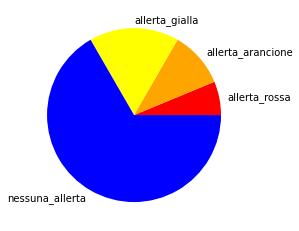

In [97]:
#GRAFICO ALLERTE METEO

# contare il numero di città in ogni categoria di allerta
allerta_counts = {'allerta_rossa': 3, 'allerta_arancione': 5, 'allerta_gialla': 8, 'nessuna_allerta': 32}
colors = ['red', 'orange', 'yellow', 'blue']
# estrarre i valori e le etichette dal dizionario
values = list(allerta_counts.values())
labels = list(allerta_counts.keys())

# creare il grafico a torta
plt.pie(values, colors=colors, labels=labels)

# mostrare il grafico
plt.show()